In [1]:
import numpy as np
import math
import operator
import pandas as pd
import os
import time
from datetime import datetime
from time import mktime

import matplotlib
import matplotlib.pyplot as plt

from matplotlib import style
# style.use('dark_background')
style.use('ggplot')
import seaborn as sns

#import re
#import urllib
#path = "/home/juanma/Datos/owncloud_UPM/programacion/python/marcadores"
#url = "https://community.watsonanalytics.com/wp-content/uploads/2015/04/WA_Fn-UseC_-Sales-Win-Loss.csv"
#sales_data = pd.read_csv(url)
#data = pd.read_csv("iris.csv")
# data = pd.read_excel('Data/Datos_Clave_Colon_days_clean_jmp.xlsm', header=0)
# df_data = pd.read_excel('Data/COMPLETO4.xlsx')

C:\Users\juanm\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df_recaid = pd.read_excel('cito_histo_cohort_tiempos_recae_FJD_HRC_HCR_crop.xlsx')

In [3]:
df_recaid.columns

Index(['Unnamed: 0', 'CODIGO PACIENTE', 'FECHA MUESTRA', 'FECHA DX 1L',
       'FECHA DX 2L', 'T', 'N', 'M', 'porcentaje_BCRP1', 'porcentaje_AC133',
       'porcentaje_CD133', 'porcentaje_LGR5', 'porcentaje_CD34',
       'porcentaje_EPCAM', 'porcentaje_CD166', 'porcentaje_CD44V6',
       'porcentaje_TROP2', 'porcentaje_CD44', 'T_recaida1', 'T_recaida2',
       'T_hasta_recaida', 'T_desde_recaida', 'recae?', 'cohort'],
      dtype='object')

In [41]:
df_recaid.rename(columns={'Unnamed: 0': 'CODIGO MUESTRA'}, inplace=True)

In [42]:
df_recaid.set_index('CODIGO MUESTRA',drop=False, inplace=True)

In [43]:
cols_markers= ['porcentaje_BCRP1', 'porcentaje_AC133', 'porcentaje_CD133', 'porcentaje_LGR5',
       'porcentaje_CD34', 'porcentaje_CD166',  'porcentaje_EPCAM', 'porcentaje_TROP2','porcentaje_CD44V6', ]

In [44]:
cols_HC = ['T', 'N', 'M', 'recae?']

In [45]:
cols_dt = ['T_hasta_recaida', 'T_desde_recaida']

In [46]:
columns = cols_markers + cols_HC # en otros archivos 'Unnamed: 0' es 'id_muestra'
print(columns)

['porcentaje_BCRP1', 'porcentaje_AC133', 'porcentaje_CD133', 'porcentaje_LGR5', 'porcentaje_CD34', 'porcentaje_CD166', 'porcentaje_EPCAM', 'porcentaje_TROP2', 'porcentaje_CD44V6', 'T', 'N', 'M', 'recae?']


In [47]:
df_data_hist = df_recaid[columns].copy()

In [48]:
df_data_hist.head()

,porcentaje_BCRP1,porcentaje_AC133,porcentaje_CD133,porcentaje_LGR5,porcentaje_CD34,porcentaje_CD166,porcentaje_EPCAM,porcentaje_TROP2,porcentaje_CD44V6,T,N,M,recae?
CODIGO MUESTRA,,,,,,,,,,,,,
HJD0001,92.839,58.139,63.939,NaN,NaN,NaN,10.80,NaN,NaN,T3,N1,M0,True
HJD0023,78.500,4.170,23.400,80.00,76.10,15.50,0.00,8.250,86.20,T3,N1,M0,True
HJD0083,0.098,0.200,0.480,40.10,0.14,0.28,0.14,0.000,0.00,T3,N1,M0,False
HJD0086,0.000,0.000,0.000,0.23,0.00,1.28,0.00,0.072,1.62,T3,N1,M0,False
HJD0002,99.200,52.600,56.800,NaN,NaN,NaN,6.43,NaN,NaN,T3,N1,M0,False


In [25]:
df_data_hist.head()

,porcentaje_BCRP1,porcentaje_AC133,porcentaje_CD133,porcentaje_LGR5,porcentaje_CD34,porcentaje_CD166,porcentaje_EPCAM,porcentaje_TROP2,porcentaje_CD44V6,T,N,M,recae?
CODIGO MUESTRA,,,,,,,,,,,,,
HJD0001,92.839,58.139,63.939,NaN,NaN,NaN,10.80,NaN,NaN,T3,N1,M0,True
HJD0023,78.500,4.170,23.400,80.00,76.10,15.50,0.00,8.250,86.20,T3,N1,M0,True
HJD0083,0.098,0.200,0.480,40.10,0.14,0.28,0.14,0.000,0.00,T3,N1,M0,False
HJD0086,0.000,0.000,0.000,0.23,0.00,1.28,0.00,0.072,1.62,T3,N1,M0,False
HJD0002,99.200,52.600,56.800,NaN,NaN,NaN,6.43,NaN,NaN,T3,N1,M0,False


Vamos a ver cuántos "NaN" tiene cada columna para ver si hay que quitar alguna

In [10]:
print(df_data_hist.isnull().sum())

CODIGO MUESTRA        0
porcentaje_BCRP1      0
porcentaje_AC133      0
porcentaje_CD133      3
porcentaje_LGR5       8
porcentaje_CD34       7
porcentaje_CD166     16
porcentaje_EPCAM      3
porcentaje_TROP2     21
porcentaje_CD44V6     6
recae?                0
dtype: int64


## Quito "CD36" y "RAGE" porque tienen más de 75 NaN !!!!

In [26]:
cols_markers2= ['porcentaje_BCRP1',
       'porcentaje_AC133', 'porcentaje_CD133', 'porcentaje_LGR5',
       'porcentaje_CD34', 'porcentaje_CD166',
       'porcentaje_EPCAM', 'porcentaje_TROP2', 'porcentaje_CD44V6'] #### quito  'porcentaje_DCLK1',

In [36]:
df2 = df_data_hist[ cols_markers ].copy()  ### 'Unnamed: 0'  es 'id_muestra'
df2.head()

,porcentaje_BCRP1,porcentaje_AC133,porcentaje_CD133,porcentaje_LGR5,porcentaje_CD34,porcentaje_CD166,porcentaje_EPCAM,porcentaje_TROP2,porcentaje_CD44V6
CODIGO MUESTRA,,,,,,,,,
HJD0001,92.839,58.139,63.939,NaN,NaN,NaN,10.80,NaN,NaN
HJD0023,78.500,4.170,23.400,80.00,76.10,15.50,0.00,8.250,86.20
HJD0083,0.098,0.200,0.480,40.10,0.14,0.28,0.14,0.000,0.00
HJD0086,0.000,0.000,0.000,0.23,0.00,1.28,0.00,0.072,1.62
HJD0002,99.200,52.600,56.800,NaN,NaN,NaN,6.43,NaN,NaN


In [37]:
df2.dropna(axis=0, inplace=True)

In [38]:
print(df2.isnull().sum())

porcentaje_BCRP1     0
porcentaje_AC133     0
porcentaje_CD133     0
porcentaje_LGR5      0
porcentaje_CD34      0
porcentaje_CD166     0
porcentaje_EPCAM     0
porcentaje_TROP2     0
porcentaje_CD44V6    0
dtype: int64


### Eliminar filas para probar

In [ ]:
df3 = df2.copy()

In [ ]:
df3.head()

### Elimino por número de fila

In [ ]:
df3.drop(df3.index[1], axis=0, inplace=True)
df3.head()

### Elimino por valor en una columna

In [ ]:
df3.drop(df3[df3['Unnamed: 0']=='HJD0064'].index, axis=0, inplace=True)
df3.head()

In [ ]:
# df2.to_excel('cito_histo_cohort_recae_FJD_HRC_HCR_crop_sin_NaN.xlsx')

In [ ]:
#################
### Ejecutar solo si se ha quitado alguna fila para probar

df2 = df3.copy()
################

## Calculamos correlaciones

In [55]:
df_recaid.columns

Index(['CODIGO MUESTRA', 'CODIGO PACIENTE', 'FECHA MUESTRA', 'FECHA DX 1L',
       'FECHA DX 2L', 'T', 'N', 'M', 'porcentaje_BCRP1', 'porcentaje_AC133',
       'porcentaje_CD133', 'porcentaje_LGR5', 'porcentaje_CD34',
       'porcentaje_EPCAM', 'porcentaje_CD166', 'porcentaje_CD44V6',
       'porcentaje_TROP2', 'porcentaje_CD44', 'T_recaida1', 'T_recaida2',
       'T_hasta_recaida', 'T_desde_recaida', 'recae?', 'cohort'],
      dtype='object')

In [56]:
cols_mark_dt = cols_markers2 + cols_dt
print(cols_mark_dt)

['porcentaje_BCRP1', 'porcentaje_AC133', 'porcentaje_CD133', 'porcentaje_LGR5', 'porcentaje_CD34', 'porcentaje_CD166', 'porcentaje_EPCAM', 'porcentaje_TROP2', 'porcentaje_CD44V6', 'T_hasta_recaida', 'T_desde_recaida']


In [57]:
df2 = df_recaid[ cols_mark_dt ].copy()  ### 'Unnamed: 0'  es 'id_muestra'
df2.head()

,porcentaje_BCRP1,porcentaje_AC133,porcentaje_CD133,porcentaje_LGR5,porcentaje_CD34,porcentaje_CD166,porcentaje_EPCAM,porcentaje_TROP2,porcentaje_CD44V6,T_hasta_recaida,T_desde_recaida
CODIGO MUESTRA,,,,,,,,,,,
HJD0001,92.839,58.139,63.939,NaN,NaN,NaN,10.80,NaN,NaN,352.0,NaN
HJD0023,78.500,4.170,23.400,80.00,76.10,15.50,0.00,8.250,86.20,234.0,NaN
HJD0083,0.098,0.200,0.480,40.10,0.14,0.28,0.14,0.000,0.00,NaN,4.0
HJD0086,0.000,0.000,0.000,0.23,0.00,1.28,0.00,0.072,1.62,NaN,18.0
HJD0002,99.200,52.600,56.800,NaN,NaN,NaN,6.43,NaN,NaN,NaN,NaN


In [58]:
df2.head()

,porcentaje_BCRP1,porcentaje_AC133,porcentaje_CD133,porcentaje_LGR5,porcentaje_CD34,porcentaje_CD166,porcentaje_EPCAM,porcentaje_TROP2,porcentaje_CD44V6,T_hasta_recaida,T_desde_recaida
CODIGO MUESTRA,,,,,,,,,,,
HJD0001,92.839,58.139,63.939,NaN,NaN,NaN,10.80,NaN,NaN,352.0,NaN
HJD0023,78.500,4.170,23.400,80.00,76.10,15.50,0.00,8.250,86.20,234.0,NaN
HJD0083,0.098,0.200,0.480,40.10,0.14,0.28,0.14,0.000,0.00,NaN,4.0
HJD0086,0.000,0.000,0.000,0.23,0.00,1.28,0.00,0.072,1.62,NaN,18.0
HJD0002,99.200,52.600,56.800,NaN,NaN,NaN,6.43,NaN,NaN,NaN,NaN


<Axes: >

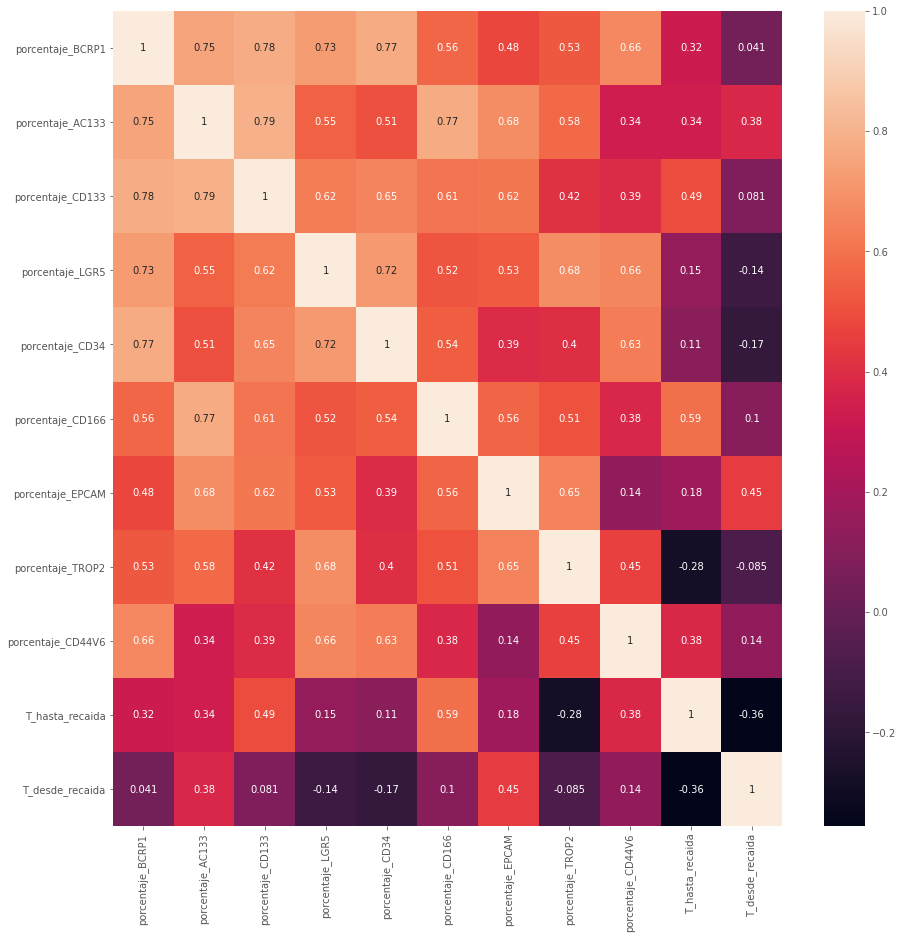

In [61]:
cor = df2.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True)